In [ ]:
# Implement Agglomerative hierarchical clustering algorithm using 
# appropriate dataset.

In [ ]:
# Name: Nalawade Prafulla Chandrashekhar.
# B.E.A.I.& D.S.
# Roll No.: 42

In [17]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc

In [18]:
#Step 2: Loading and Cleaning the data 
X=pd.read_csv(r"C:\Users\PRAFULL\OneDrive\Desktop\cl2 datasets\Customer Data.csv")

In [19]:
X.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [20]:
# Handling the missing values 
X.fillna(method ='ffill', inplace = True) 

C:\Users\PRAFULL\AppData\Local\Temp\ipykernel_13316\4104369826.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method ='ffill', inplace = True)


In [21]:
X = df.select_dtypes(include=[float, int])


In [22]:
# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

In [23]:
X.dropna(inplace=True)

In [24]:
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled)

In [25]:
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [26]:
#Step 4: Reducing the dimensionality of the Data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2']

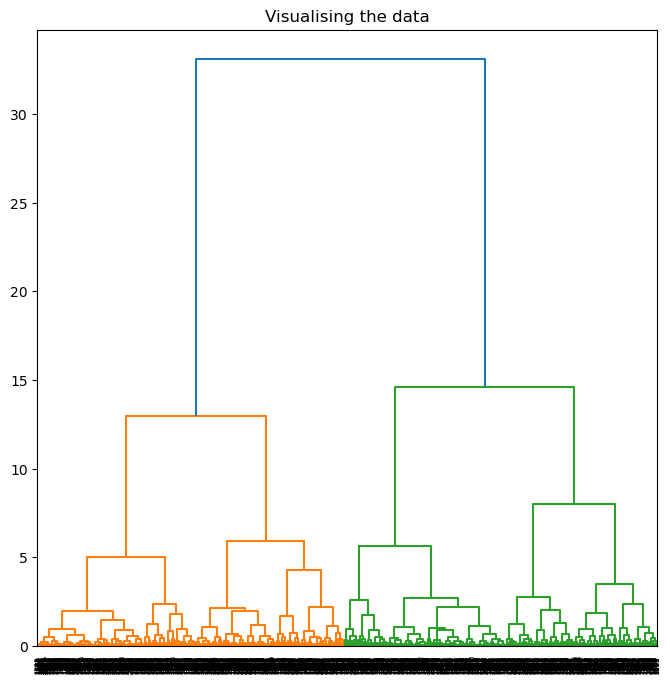

In [28]:
 #Step 5: Visualizing the working of the Dendrograms 
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

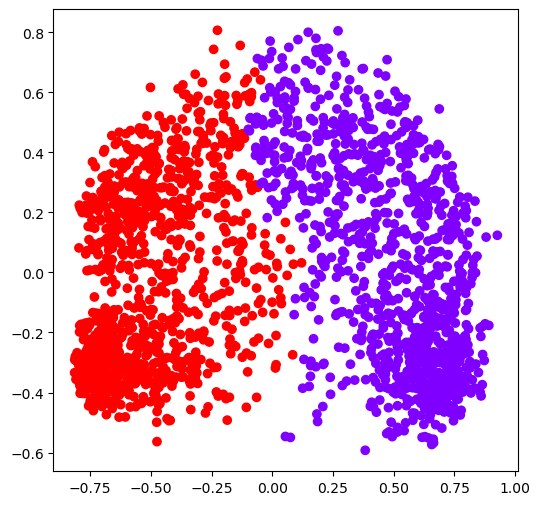

In [29]:
#Step 6: Building and Visualizing the different clustering models for different values of k a) k = 2 
ac2 = AgglomerativeClustering(n_clusters = 2) 
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

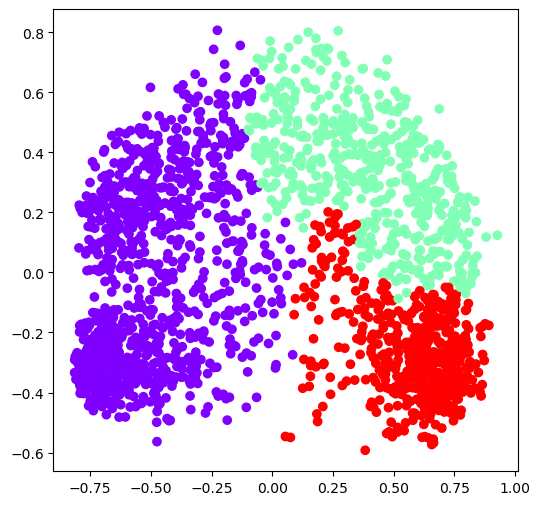

In [30]:
ac3 = AgglomerativeClustering(n_clusters = 3) 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

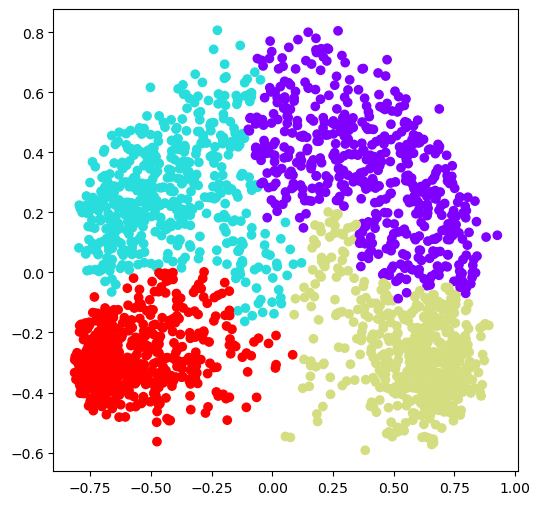

In [31]:
ac4 = AgglomerativeClustering(n_clusters = 4) 
 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

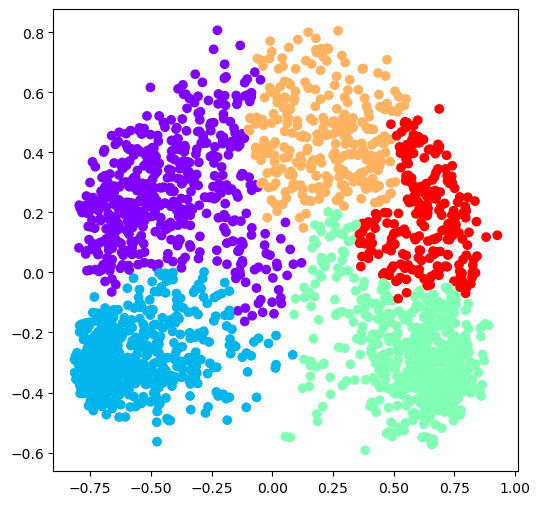

In [32]:
ac5 = AgglomerativeClustering(n_clusters = 5) 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = ac5.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

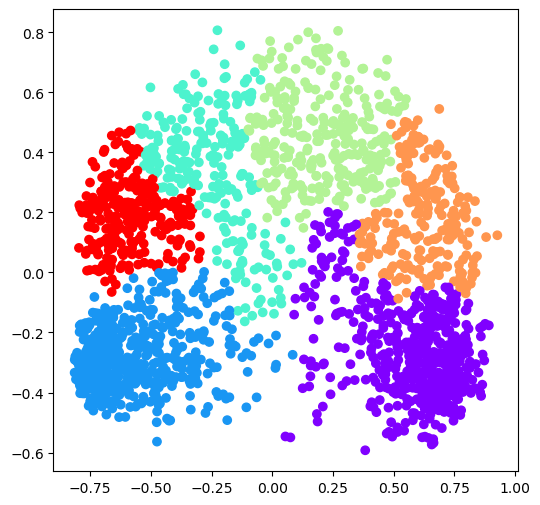

In [33]:
ac6 = AgglomerativeClustering(n_clusters = 6) 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
c = ac6.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

In [38]:
#Step 7: Evaluating the different models and Visualizing the 
#results. 
k = [2, 3, 4, 5, 6] 
 
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append( 
silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append( 
silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
silhouette_scores.append( 
silhouette_score(X_principal, ac5.fit_predict(X_principal))) 
silhouette_scores.append( 
silhouette_score(X_principal, ac6.fit_predict(X_principal)))

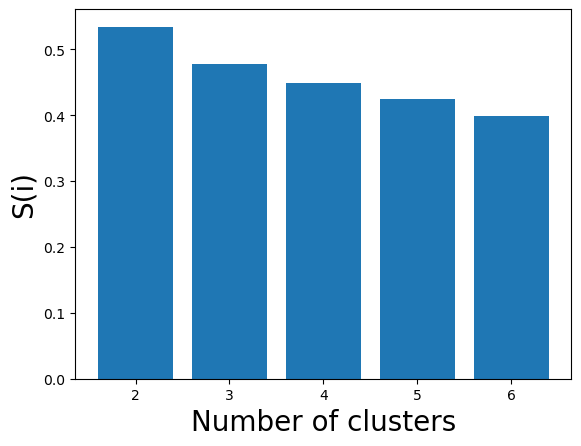

In [39]:
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()